<a href="https://colab.research.google.com/github/caramos84/Quantum/blob/main/CellularAutomaton03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


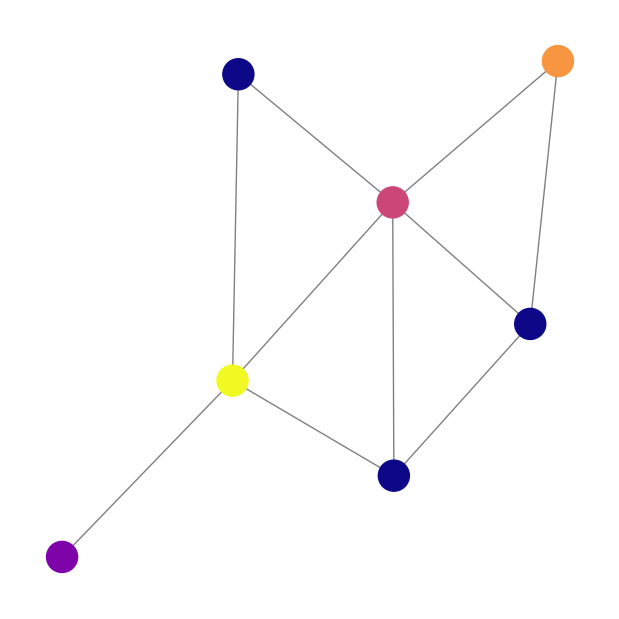

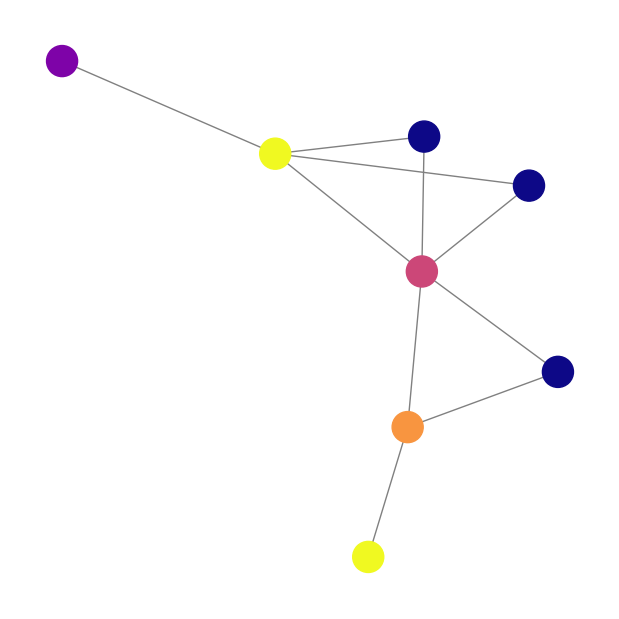

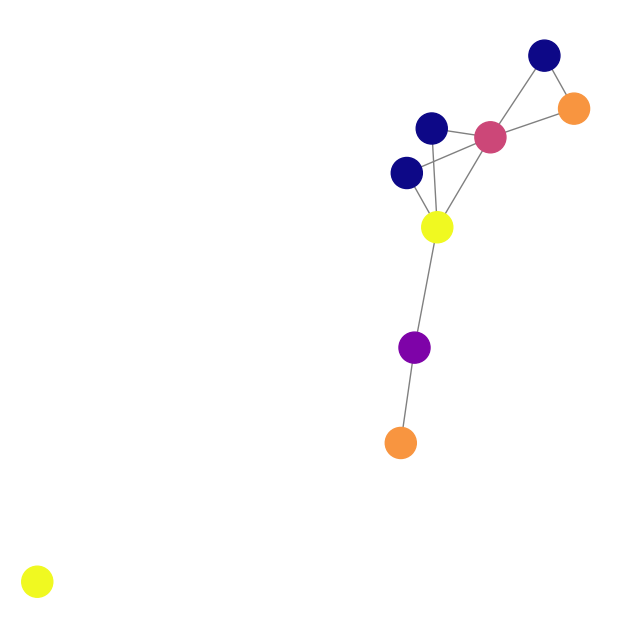

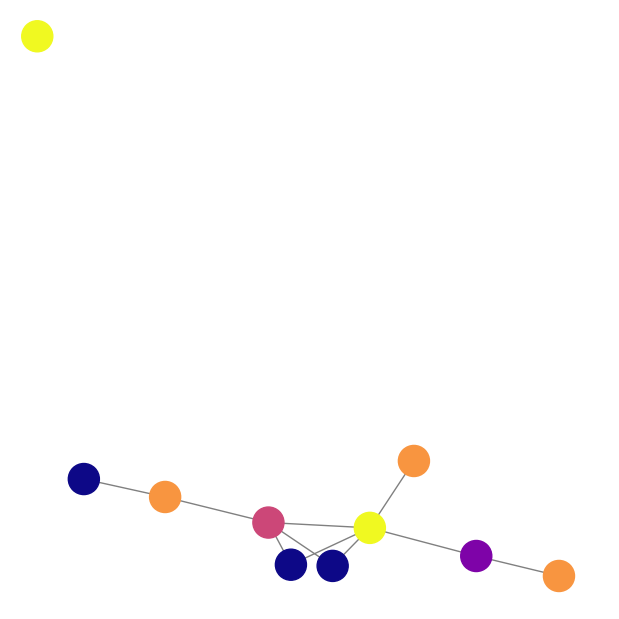

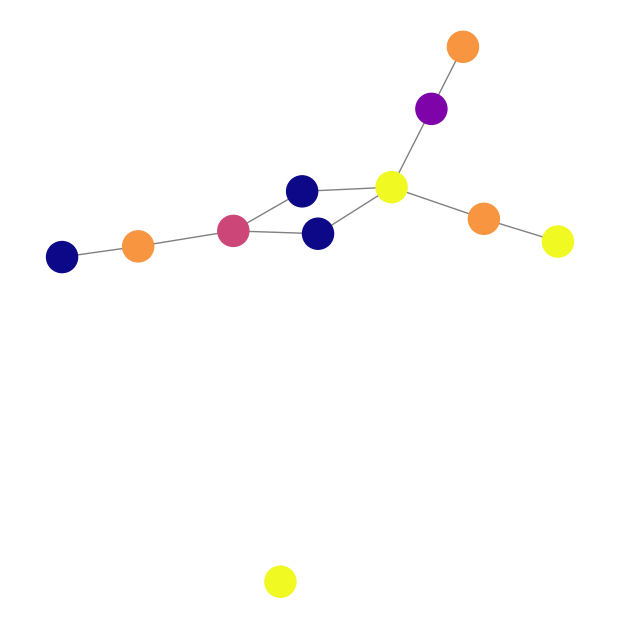

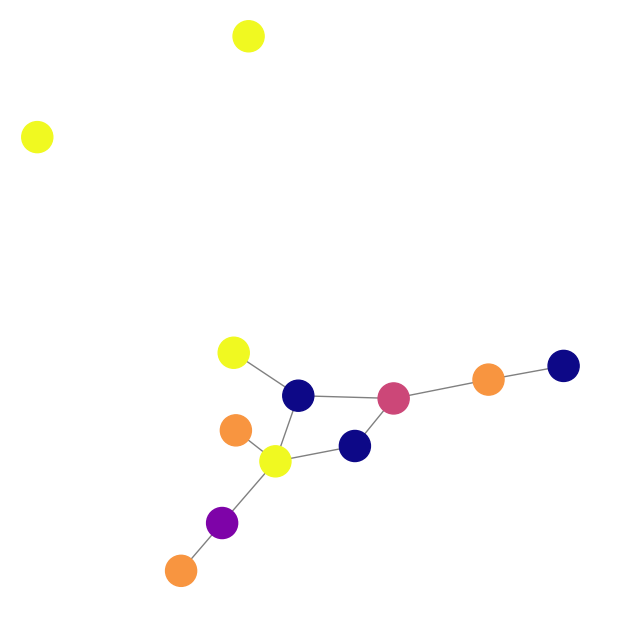

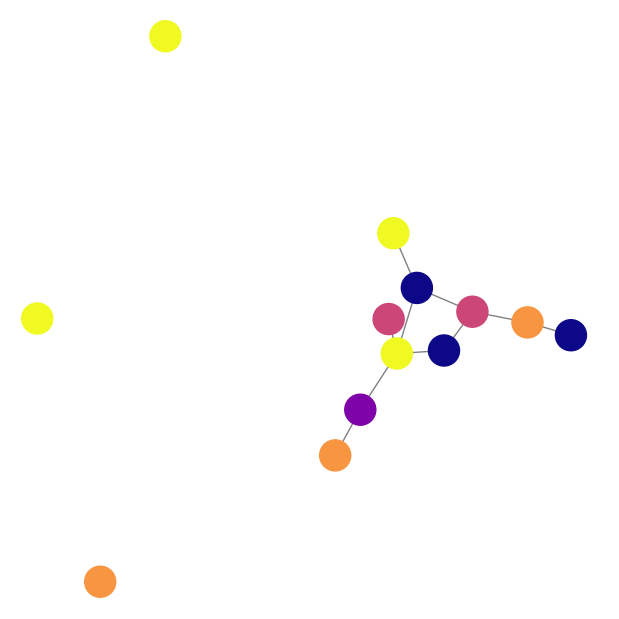

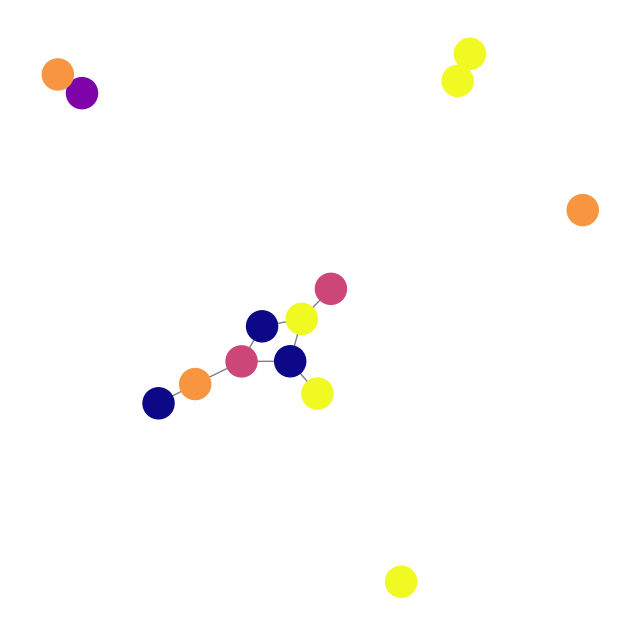

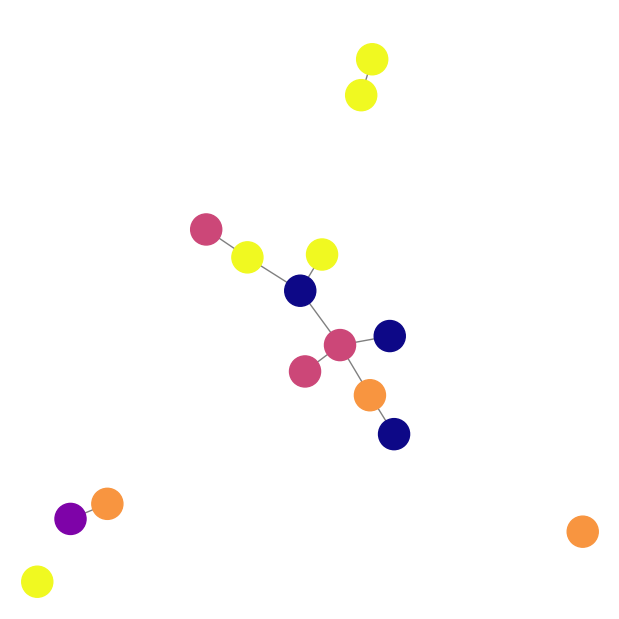

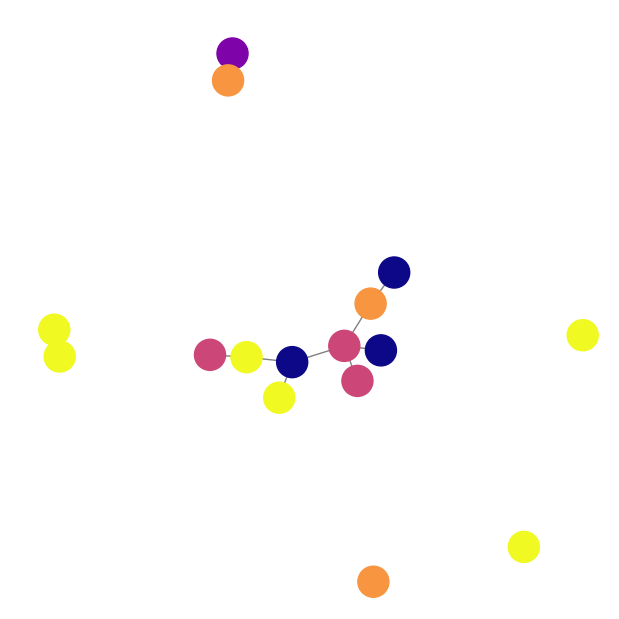

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.cm as cm

def initialize_graph(structure='random', nodes=10):
    G = nx.Graph()

    if structure == 'triangle':
        G.add_edges_from([(0, 1), (1, 2), (2, 0)])
    elif structure == 'square':
        G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
    elif structure == 'random':
        for i in range(nodes):
            G.add_node(i, state=random.randint(0, 4))  # Estado inicial aleatorio
        for _ in range(nodes * 2):  # Número arbitrario de conexiones iniciales
            a, b = random.sample(list(G.nodes), 2)
            G.add_edge(a, b)

    return G

def evolve_graph(G, iterations=10):
    for _ in range(iterations):
        # Regla 1: Crecimiento por agregación preferencial
        new_node = max(G.nodes) + 1
        existing_node = random.choice(list(G.nodes))
        G.add_node(new_node, state=random.randint(0, 4))  # Nuevo nodo con estado aleatorio
        G.add_edge(new_node, existing_node)

        # Regla 2: Eliminación de conexiones débiles (aleatorias en este caso)
        if G.number_of_edges() > 3:
            edge_to_remove = random.choice(list(G.edges))
            G.remove_edge(*edge_to_remove)

        draw_graph(G)

def draw_graph(G):
    plt.figure(figsize=(6, 6))

    # Generar colores basados en estados
    states = [G.nodes[n]['state'] for n in G.nodes]
    colors = cm.plasma(np.array(states) / max(states))  # Escala de colores

    nx.draw(G, node_color=colors, edge_color='gray', node_size=500, cmap=cm.plasma)
    plt.show()

# Configuración inicial y evolución
graph = initialize_graph('random', nodes=6)
evolve_graph(graph, iterations=10)